In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from mpl_toolkits.mplot3d import Axes3D


In [3]:
# The superstore wants to predict the likelihood of the customer 
# giving a positive response and wants to identify the different factors which affect the customer's response
df = pd.read_csv("superstore_data.csv")
print(df.shape)
print(df.columns)

(2240, 22)
Index(['Id', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'Response', 'Complain'],
      dtype='object')


In [4]:
df.head()
# Me being biased, the following columns might be more relevant in this task then the others 
# NumDealsPurchases - number of purchases made with discount
# NumCatalogPurchases - number of purchases made using catalog (buying goods to be shipped through the mail)
# NumStorePurchases - number of purchases made directly in stores
# NumWebPurchases - number of purchases made through the company's website
# NumWebVisitsMonth - number of visits to company's website in the last month
# I will pick three of them and try to make a 3D plot with a decision boundary 

,Id,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain
0,1826,1970,Graduation,Divorced,84835.0,0,0,6/16/2014,0,189,...,111,189,218,1,4,4,6,1,1,0
1,1,1961,Graduation,Single,57091.0,0,0,6/15/2014,0,464,...,7,0,37,1,7,3,7,5,1,0
2,10476,1958,Graduation,Married,67267.0,0,1,5/13/2014,0,134,...,15,2,30,1,3,2,5,2,0,0
3,1386,1967,Graduation,Together,32474.0,1,1,11/5/2014,0,10,...,0,0,0,1,1,0,2,7,0,0
4,5371,1989,Graduation,Single,21474.0,1,0,8/4/2014,0,6,...,11,0,34,2,3,1,2,7,1,0


In [5]:
df['Response'].unique()

array([1, 0], dtype=int64)

In [6]:
df['Response'].isnull().sum()
# so it is clean 

0

In [7]:
# how about the other colummns
df.isnull().sum()

Id                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
Response                0
Complain                0
dtype: int64

In [8]:
# create a new df based on my bias
selected_features = ["NumDealsPurchases", "NumStorePurchases", "NumWebPurchases"] 
df_new = df[selected_features + ["Response"]]

In [9]:
# Drop rows with missing values (after feature selection)
df_new = df_new.dropna()

In [10]:
# Split to input/output
X = df_new[selected_features].values # convert to np.array for efficiency
y = df_new["Response"].values

In [11]:
# Standardize features
# Without scaling, features with larger ranges can lead to larger gradients, 
# causing the optimization process to oscillate or take longer to find the minimum of the loss function
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [12]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

In [13]:
# this is a binary clssification task, so we use the sigmoid function in the last layer
# try a different regulator here instead of the dropout
from tensorflow.keras import regularizers
model_v1 = Sequential([
    Dense(16, activation='relu', input_shape=(3,),
          kernel_regularizer=regularizers.l2(0.001)),# L2 regularization:  Adds the sum of the absolute values of the weights to the loss function
    Dense(8, activation='relu',
          kernel_regularizer=regularizers.l2(0.001)), 
    Dense(1, activation='sigmoid')
])
# The regularization favors smaller weights over larger ones, and hence help prevent over-fitting
model_v1.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

C:\Users\dodo8\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [14]:
history_v1 = model_v1.fit(X_train, y_train, epochs=50, batch_size=32,
                    validation_data=(X_test, y_test), verbose=1)

Epoch 1/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.3009 - loss: 0.7856 - val_accuracy: 0.6607 - val_loss: 0.7063
Epoch 2/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7530 - loss: 0.6824 - val_accuracy: 0.8326 - val_loss: 0.6426
Epoch 3/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8517 - loss: 0.6199 - val_accuracy: 0.8393 - val_loss: 0.5781
Epoch 4/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8604 - loss: 0.5473 - val_accuracy: 0.8393 - val_loss: 0.5146
Epoch 5/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8522 - loss: 0.4882 - val_accuracy: 0.8393 - val_loss: 0.4697
Epoch 6/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8623 - loss: 0.4331 - val_accuracy: 0.8393 - val_loss: 0.4528
Epoch 7/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8593 - loss: 0.4085 - val_accuracy: 0.8393 - val_loss: 0.4491
Epoch 8/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8579 - loss: 0.4117 - val_accuracy: 0.8393 - val_loss:

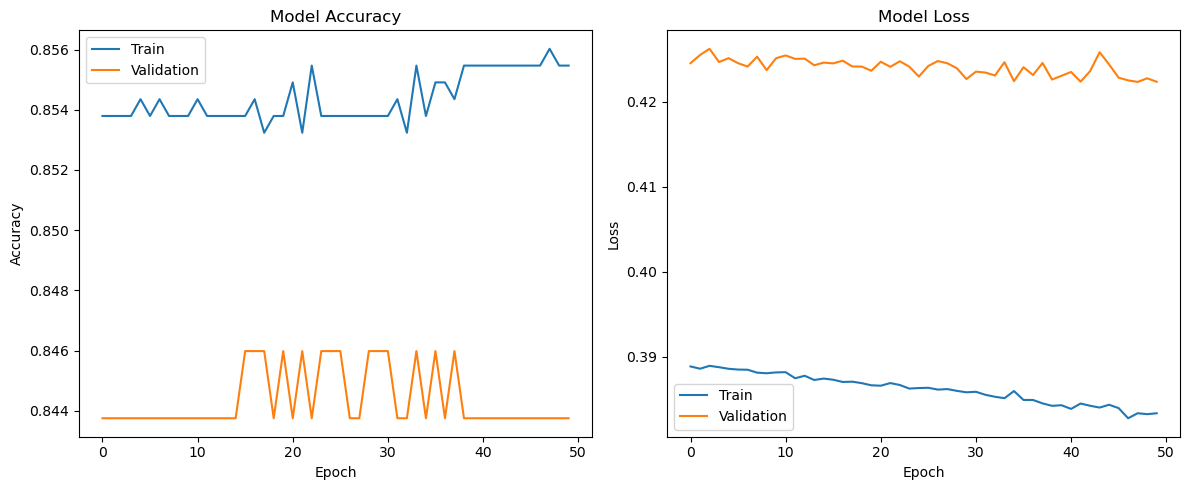

In [34]:
plt.figure(figsize=(12, 5))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history_v1.history['accuracy'], label='Train')
plt.plot(history_v1.history['val_accuracy'], label='Validation')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss
plt.subplot(1, 2, 2)
plt.plot(history_v1.history['loss'], label='Train')
plt.plot(history_v1.history['val_loss'], label='Validation')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [38]:
# big room for improvement :P
# let's remove the regulator first
model_v2 = Sequential([
    Dense(16, activation='relu', input_shape=(3,)),
    Dense(8, activation='relu'), 
    Dense(1, activation='sigmoid')
])
model_v2.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

In [39]:
history_v2 = model_v2.fit(X_train, y_train, epochs=50, batch_size=32,
                    validation_data=(X_test, y_test), verbose=1)

Epoch 1/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7490 - loss: 0.6577 - val_accuracy: 0.8393 - val_loss: 0.5813
Epoch 2/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8415 - loss: 0.5435 - val_accuracy: 0.8393 - val_loss: 0.4735
Epoch 3/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8628 - loss: 0.4222 - val_accuracy: 0.8393 - val_loss: 0.4450
Epoch 4/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8684 - loss: 0.3848 - val_accuracy: 0.8393 - val_loss: 0.4419
Epoch 5/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8595 - loss: 0.3880 - val_accuracy: 0.8393 - val_loss: 0.4398
Epoch 6/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8610 - loss: 0.3871 - val_accuracy: 0.8393 - val_loss: 0.4378
Epoch 7/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8425 - loss: 0.4174 - val_accuracy: 0.8393 - val_loss: 0.4365
Epoch 8/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8518 - loss: 0.3937 - val_accuracy: 0.8393 - val_loss:

In [40]:
# Doesn't help much
# Let's think about the architecture
# try two layers
model_v3 = Sequential([
    Dense(8, activation='relu'), 
    Dense(1, activation='sigmoid')
])
model_v3.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

In [41]:
history_v3 = model_v3.fit(X_train, y_train, epochs=50, batch_size=32,
                    validation_data=(X_test, y_test), verbose=1)

Epoch 1/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.2547 - loss: 0.8199 - val_accuracy: 0.5268 - val_loss: 0.7137
Epoch 2/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6411 - loss: 0.6959 - val_accuracy: 0.7344 - val_loss: 0.6224
Epoch 3/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7616 - loss: 0.6085 - val_accuracy: 0.8170 - val_loss: 0.5585
Epoch 4/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8362 - loss: 0.5408 - val_accuracy: 0.8393 - val_loss: 0.5130
Epoch 5/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8444 - loss: 0.5055 - val_accuracy: 0.8393 - val_loss: 0.4818
Epoch 6/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8451 - loss: 0.4718 - val_accuracy: 0.8393 - val_loss: 0.4617
Epoch 7/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8498 - loss: 0.4438 - val_accuracy: 0.8393 - val_loss: 0.4485
Epoch 8/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8583 - loss: 0.4238 - val_accuracy: 0.8393 - val_loss:

In [44]:
# Back to model_v2 but try a smaller learning rate 
import tensorflow as tf
my_learning_rate = 0.0001
custom_optimizer = tf.keras.optimizers.Adam(learning_rate=my_learning_rate)
model_v2.compile(optimizer=custom_optimizer, loss="binary_crossentropy", metrics=["accuracy"])

In [45]:
history_v2_slower_learning = model_v2.fit(X_train, y_train, epochs=50, batch_size=32,
                    validation_data=(X_test, y_test), verbose=1)

Epoch 1/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.8507 - loss: 0.3812 - val_accuracy: 0.8371 - val_loss: 0.4146
Epoch 2/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8708 - loss: 0.3418 - val_accuracy: 0.8371 - val_loss: 0.4145
Epoch 3/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8595 - loss: 0.3563 - val_accuracy: 0.8371 - val_loss: 0.4144
Epoch 4/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8593 - loss: 0.3509 - val_accuracy: 0.8371 - val_loss: 0.4145
Epoch 5/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8462 - loss: 0.3738 - val_accuracy: 0.8371 - val_loss: 0.4145
Epoch 6/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8650 - loss: 0.3488 - val_accuracy: 0.8371 - val_loss: 0.4144
Epoch 7/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8537 - loss: 0.3651 - val_accuracy: 0.8371 - val_loss: 0.4145
Epoch 8/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8461 - loss: 0.3955 - val_accuracy: 0.8371 - val_loss:

In [46]:
history_v2_slower_learning_larger_epoch = model_v2.fit(X_train, y_train, epochs=500, batch_size=32,
                    validation_data=(X_test, y_test), verbose=1)

Epoch 1/500
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8619 - loss: 0.3662 - val_accuracy: 0.8371 - val_loss: 0.4137
Epoch 2/500
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8530 - loss: 0.3672 - val_accuracy: 0.8371 - val_loss: 0.4137
Epoch 3/500
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8414 - loss: 0.3911 - val_accuracy: 0.8371 - val_loss: 0.4138
Epoch 4/500
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8444 - loss: 0.3725 - val_accuracy: 0.8371 - val_loss: 0.4138
Epoch 5/500
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8646 - loss: 0.3526 - val_accuracy: 0.8371 - val_loss: 0.4137
Epoch 6/500
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8565 - loss: 0.3580 - val_accuracy: 0.8371 - val_loss: 0.4137
Epoch 7/500
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8622 - loss: 0.3529 - val_accuracy: 0.8371 - val_loss: 0.4136
Epoch 8/500
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8605 - loss: 0.3492 - val_accuracy: 0.8371 - v

79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 959us/step


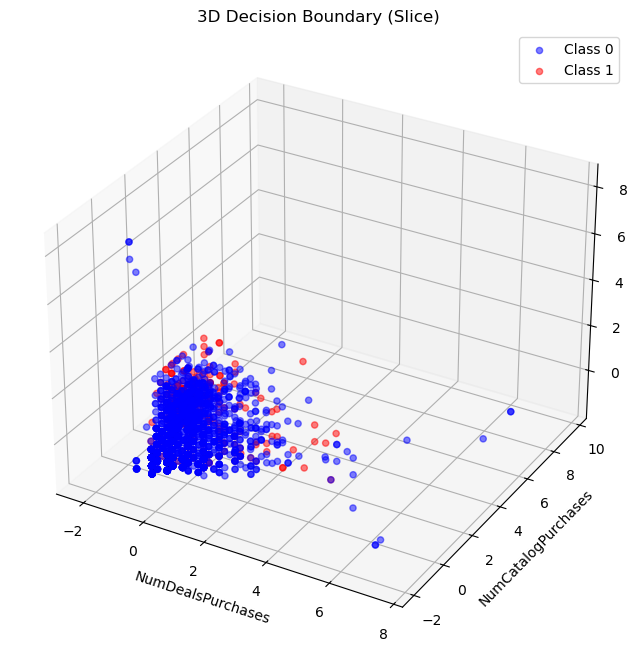

In [16]:
# Ok, so incresing the Epoch doesn't help
# Probably I need to perform Principal Component Analysis on more features, instead of testing 3 features based on 
# my own intuition
# Let's end this sesstion with a plot (to study later)

X = df[['NumDealsPurchases', 'NumCatalogPurchases', 'NumWebPurchases']].values
y = df['Response'].values

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

x_min, x_max = X_scaled[:, 0].min() - 1, X_scaled[:, 0].max() + 1
y_min, y_max = X_scaled[:, 1].min() - 1, X_scaled[:, 1].max() + 1
z_min, z_max = X_scaled[:, 2].min() - 1, X_scaled[:, 2].max() + 1

xx, yy = np.meshgrid(
    np.linspace(x_min, x_max, 50),
    np.linspace(y_min, y_max, 50)
)

# For fixed z slice
z_slice = 0  # choose z value to slice at

grid = np.c_[xx.ravel(), yy.ravel(), np.full(xx.ravel().shape, z_slice)]

Z = model_v1.predict(grid)
Z = Z.reshape(xx.shape)

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X_scaled[y==0][:,0], X_scaled[y==0][:,1], X_scaled[y==0][:,2], c='blue', label='Class 0', alpha=0.5)
ax.scatter(X_scaled[y==1][:,0], X_scaled[y==1][:,1], X_scaled[y==1][:,2], c='red', label='Class 1', alpha=0.5)

# Plot 2D decision boundary slice
ax.contourf(xx, yy, Z, zdir='z', offset=z_slice, levels=[0.49, 0.51], colors=['green'], alpha=0.3)

ax.set_xlabel('NumDealsPurchases')
ax.set_ylabel('NumCatalogPurchases')
ax.set_zlabel('NumWebPurchases')
ax.set_title('3D Decision Boundary (Slice)')
ax.legend()

plt.show()
